In [1]:
from glob import glob
import os

import hydrofunctions as hf
import earthpy as et
import seaborn as sns
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import folium
import matplotcheck.notebook as nb
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag
import numpy as np

# We are adding this for you as there is a bug in hydrofunctions that
# Turns off plotting
%matplotlib inline

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download the data
data_url = 'https://ndownloader.figshare.com/files/25564340'
data = et.data.get_data(url=data_url)
    
# Create variable for data path
all_data_path = os.path.join(et.io.HOME, 'earth-analytics', 'data')

# Check that path exists and if so set to working directory
if os.path.exists(all_data_path):
    print("This directory exists, and is set to current working directory.")
    os.chdir(all_data_path)

# If directory does not exist, create it and set to working directory
else:
    print("This directory does not exist, but is being created.")
    os.mkdir(all_data_path)
    os.chdir(all_data_path)
    
# Download the data
precip_data = et.data.get_data(url=data_url)

This directory exists, and is set to current working directory.


In [3]:
# Define your function here using a numpy style doc-string
def open_df_daily_to_monthly(data_path):
    """Imports a csv, subsets/recalculates data, and adds site name column

    Parameters
    ----------
    data_path : string
        Path to a data csv file

    Returns
    -------
    monthly_precip_df : dataframe
        Dataframe created from downloaded csv    """

    # YOUR CODE HERE

    # Open timeseries data with read_csv()
    precip_df = pd.read_csv(data_path,
                            parse_dates=['DATE'],
                            index_col=['DATE'])

    # Subset dataframe to show only 1989-2018 data, calculate monthly total 
    monthly_precip_df = precip_df['1989':'2018'].resample('M').sum()

    # Add columns for site location and month 
    monthly_precip_df['Site'] = os.path.basename(data_path).split("-")[0]
    monthly_precip_df['Month'] = monthly_precip_df.index.month

    return monthly_precip_df

In [4]:
# In this cell create a function to support figure one that opens
# data using hydrofunctions and returns a dataframe  with
# x,y location, site name and discharge data

def create_df(site, start, end):
    """Imports data to dataframe, adds geolocation and stream gage site name

    Parameters
    ----------
    site : string
        Site number as specified by USGS
        
    start : string
        Desired start date for data
        
    end : string
        Desired end date for data 

    Returns
    -------
    response_df : dataframe
        Dataframe created from downloaded csv    """
    
    # YOUR CODE HERE
    
    # Generate dataframe from NWIS for gage discharge data at specified sites
    response = hf.NWIS(site, 'dv', start, end, parameterCd='00060')
    response_df = response.df()

    # Rename columns for discharge and flags
    response_df.columns = ('discharge', 'qualifiers')
    
    # Add column for site name
    response_df["sitename"] = hf.get_nwis_property(response.json, key='siteName')[0]
   
    # Add columns for gage location latitude and longitude
    geolocation =   hf.get_nwis_property(response.json, key='geoLocation')[0]
    response_df["latitude"] = geolocation["geogLocation"]["latitude"]
    response_df["longitude"] = geolocation["geogLocation"]["longitude"]

    
    return response_df


In [8]:
# Generate list for site numbers
site_no = ['07289000']

# Loop for creating dataframes using 'create_df' custom function
site_df = create_df(site_no, '2019-01-01', '2019-12-31')

site_df 


Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=07289000&parameterCd=00060&startDT=2019-01-01&endDT=2019-12-31


,discharge,qualifiers,sitename,latitude,longitude
datetimeUTC,,,,,
2019-01-01 00:00:00+00:00,1100000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-02 00:00:00+00:00,1110000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-03 00:00:00+00:00,1140000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-04 00:00:00+00:00,1160000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-01-05 00:00:00+00:00,1180000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
...,...,...,...,...,...
2019-12-27 00:00:00+00:00,914000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-12-28 00:00:00+00:00,921000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833
2019-12-29 00:00:00+00:00,930000.0,A,"MISSISSIPPI RIVER AT VICKSBURG, MS",32.315,-90.905833


[Text(0.5, 0, 'Date (Month-Day)'),
 Text(0, 0.5, 'Daily Mean Stream Discharge (cu. ft. / second)')]

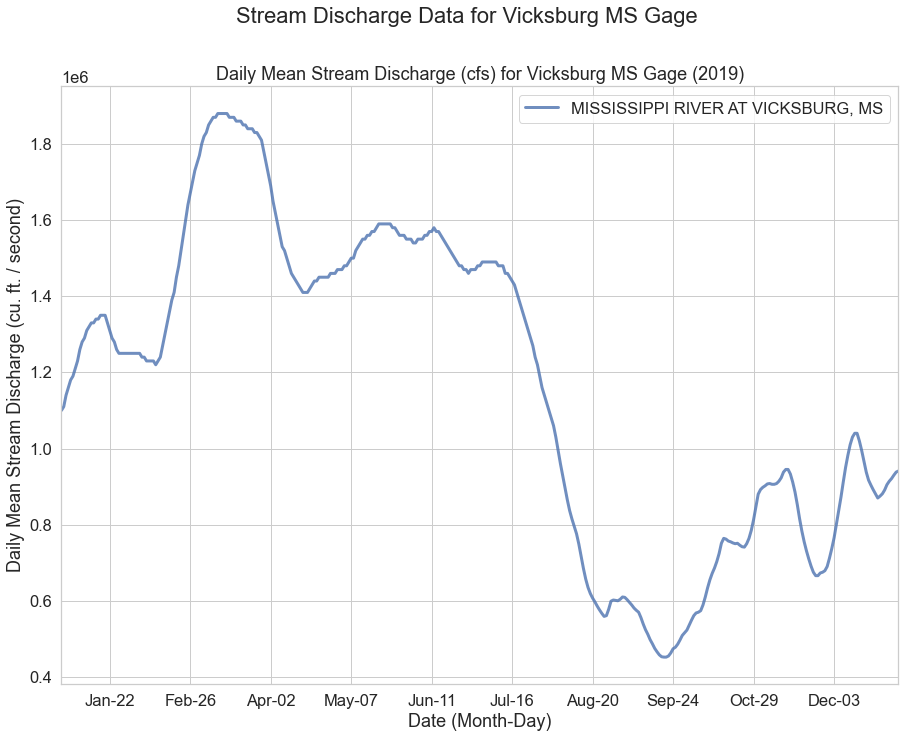

In [16]:
# Define plot space, overall size and title
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 11))

fig.suptitle(
    "Stream Discharge Data for Vicksburg MS Gage", fontsize=22)

# Loop for plotting Subplot 1
for site_name, group in site_df.groupby('sitename'):
    group.groupby('sitename').plot(y='discharge',
                                   title="Daily Mean Stream Discharge (cfs) for Vicksburg MS Gage (2019)",
                                   label=site_name,
                                   linewidth=3.0,
                                   ax=ax1,
                                   alpha=.8)

# Define the date format for Subplot 1, set axis labels
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax1.set(xlabel="Date (Month-Day)",
        ylabel="Daily Mean Stream Discharge (cu. ft. / second)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 11})